# Refinement of the Step Size of the Numerical Scheme

_Kevin Siswandi | May 2020_

In Multistep Neural Network, training is done to find the optimal parameters via minimising loss function:

$$ \arg \min_w \frac{1}{N - M + 1} \sum_{n = M}^{N} |\textbf{y}_n|^2 $$

where N is the number of data points and M multi steps. The linear difference/residual operator is defined as

$$ \textbf{y}_n = \sum_{n=0}^M \left(\alpha_m x_{n-m} + h \beta_m \textbf{f}(\textbf{x}_{n-m}) \right)$$

for $n=M,...,N$. Now, which step size to use is problem-dependent and hence needs to be tuned for performance.

In [1]:
import numpy as np
from model import lmmNet
from train import *
from predict import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import timeit

In [2]:
# specify the settings for the bier data

t0, T, h = 0, 500, 0.2 #seconds
x0 = np.array([4, 3]) #initial conditions: ATP = 4, G = 3 -- default Bier model
params = {'Vin': 0.36, 'k1': 0.02, 'kp':4, 'km':15} # damped oscillation
f_bier = lambda x, t: bier(x, t, params)

To optimize for the step size, we perform a grid search on candidate step sizes.

In [11]:
h_list = [0.3, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2] # list of step sizes to try

hidden_layer_units = 256 # number of units for the hidden layer
M = 1 # number of steps
scheme = 'AM' # LMM scheme

time_points, data = create_training_data(t0, T, h, f_bier, x0)
data.shape

TensorShape([1, 2500, 2])

## 1. Refinement -- Epochs

Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

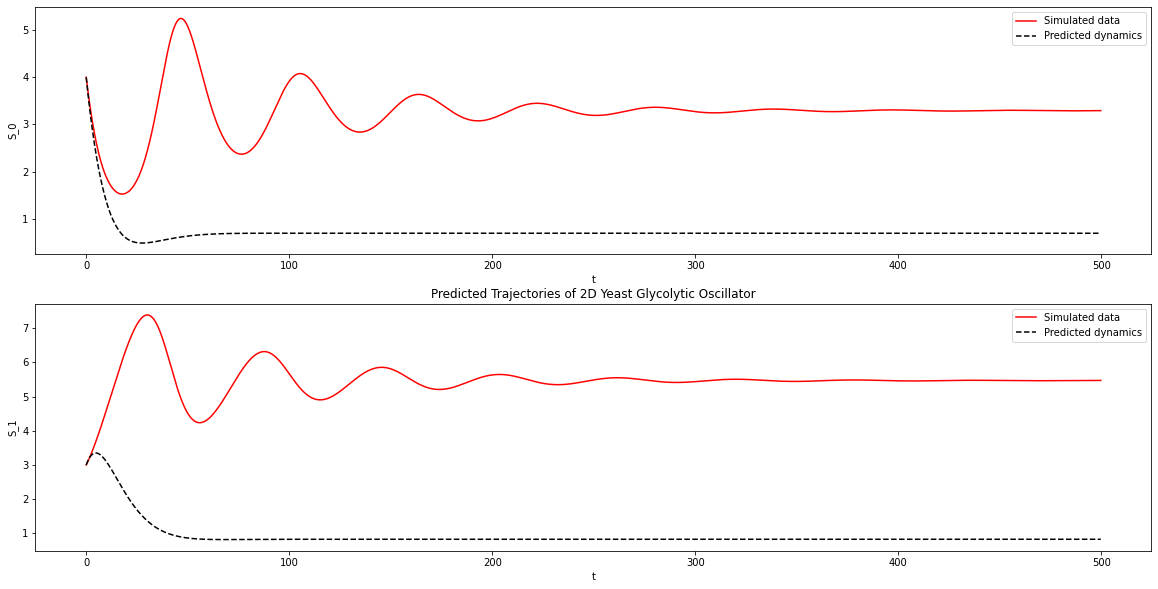

In [4]:
# test if it works for 5 epochs
net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 5
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

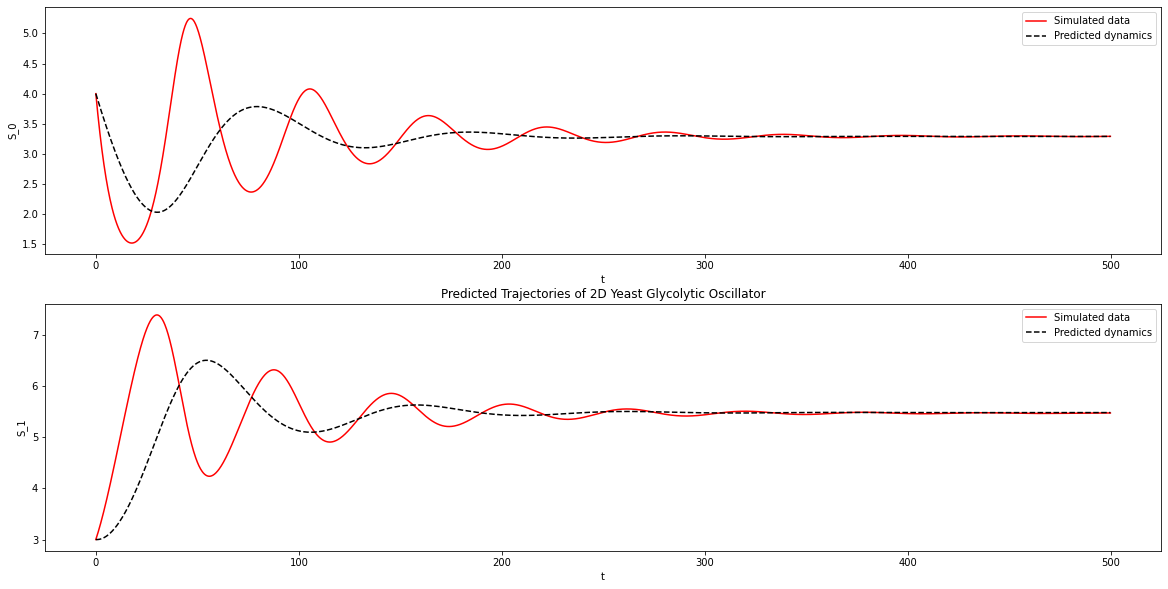

In [5]:
# test for 100 epochs

net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 100
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

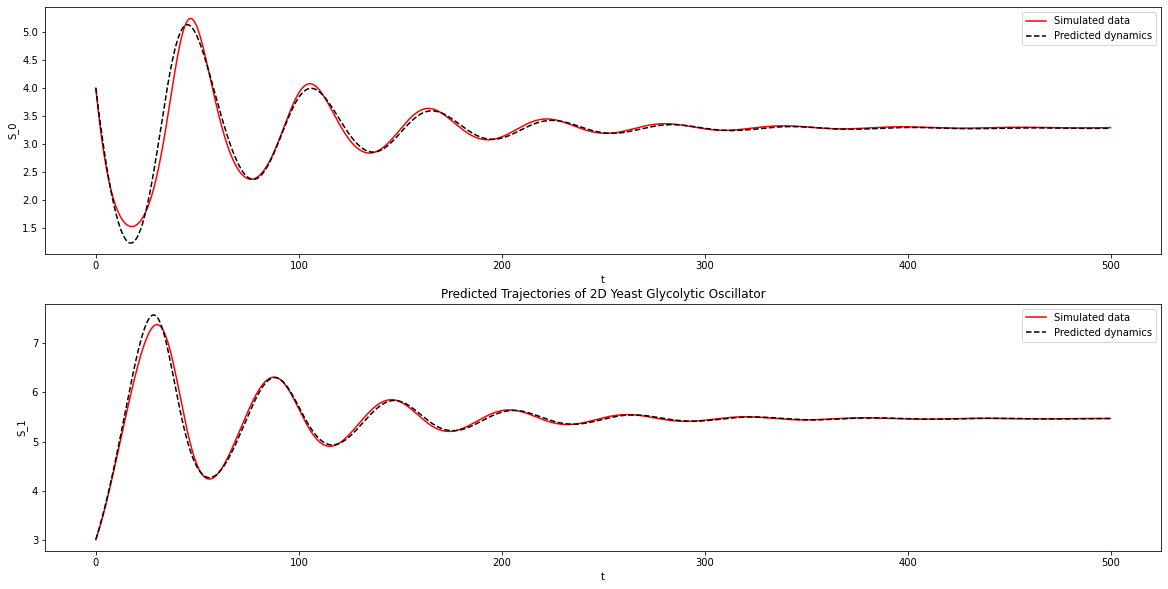

In [7]:
# test for 1000 epochs

net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 1000
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

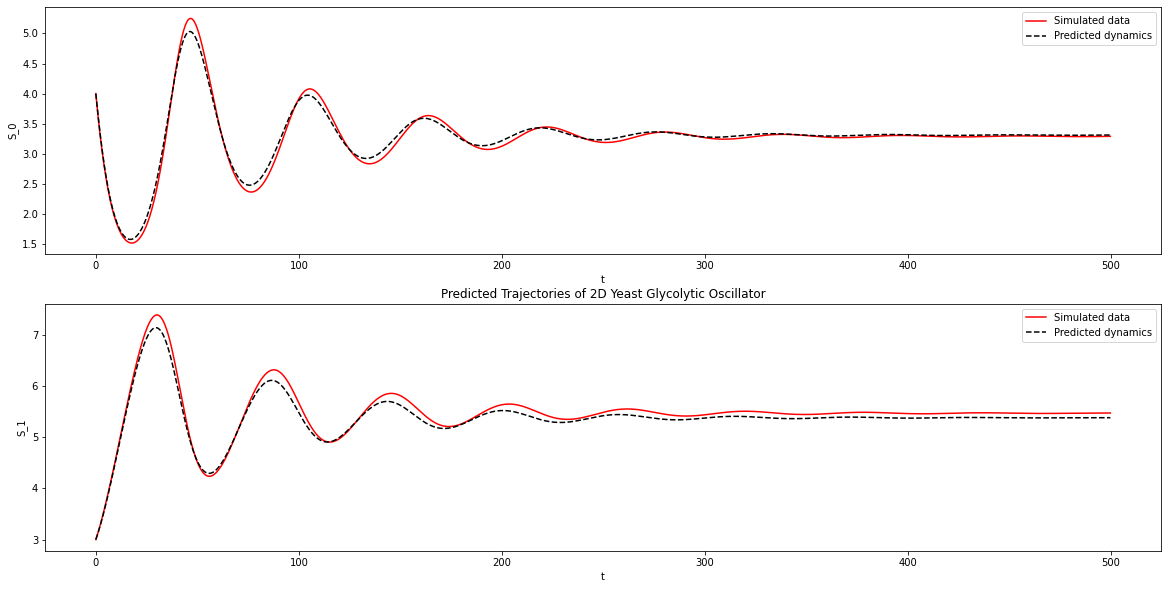

In [8]:
# test for 10000 epochs

net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 10000
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


## 2. Refinement -- Step Size

In [ ]:
result_dict = {}
for h in h_list:
    print('Training for step size = ', h)
    net = lmmNet(h, data, M, scheme, hidden_layer_units)
    N_Iter = 10000
    net.train(N_Iter)
    pred = odeint(predict_fn, x0, time_points, args=(net,))
    
    result_dict[h] = pred
    #result_dict['f_pred'] = [ml_f(x, None, model) for x in data]

Training for step size =  0.3
Training for step size =  0.2
Training for step size =  0.4
Training for step size =  0.5
Training for step size =  0.6
Training for step size =  0.7
Training for step size =  0.8
Training for step size =  0.9
Training for step size =  1.0
Training for step size =  1.1


In [6]:
step_size = 0.01

net = lmmNet(step_size, gly_data.reshape(1, gly_data.shape[0], -1), M = 1, scheme='AM') # use trapezoidal rule (smallest error constant that is also stable)

In [7]:
epochs = 50000
net.train(epochs)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch: 0, Loss: 9.688e-03, Time: 0.16
Epoch: 10, Loss: 9.408e-03, Time: 0.82
Epoch: 20, Loss: 9.159e-03, Time: 1.57
Epoch: 30, Loss: 8.906e-03, Time: 2.28
Epoch: 40, Loss: 8.642e-03, Time: 2.88
Epoch: 50, Loss: 8.365e-03, Time: 3.45
Epoch: 60, Loss: 8.072e-03, Time: 4.01
Epoch: 70, Loss: 7.766e-03, Time: 4.57
Epoch: 80, Loss: 7.453e-03, Time: 5.14
Epoch: 90, Loss: 7.138e-03, Time: 5.70
Epoch: 100, Loss: 6.829e-03, Time: 6.27
Epoch: 110, Loss: 6.534e-03, Time: 6.82
Epoch: 120, Loss: 6.261e-03, Time: 7.38

Epoch: 1820, Loss: 2.521e-04, Time: 98.87
Epoch: 1830, Loss: 2.487e-04, Time: 99.41
Epoch: 1840, Loss: 2.453e-04, Time: 99.94
Epoch: 1850, Loss: 2.420e-04, Time: 100.46
Epoch: 1860, Loss: 2.388e-04, Time: 100.99
Epoch: 1870, Loss: 2.356e-04, Time: 101.51
Epoch: 1880, Loss: 2.325e-04, Time: 102.36
Epoch: 1890, Loss: 2.294e-04, Time: 103.26
Epoch: 1900, Loss: 2.264e-04, Time: 103.79
Epoch: 1910, Loss: 2.235e-04, Time: 104.32
Epoch: 1920, Loss: 2.206e-04, Time: 104.85
Epoch: 1930, Loss: 2.178e-04, Time: 105.38
Epoch: 1940, Loss: 2.150e-04, Time: 105.91
Epoch: 1950, Loss: 2.123e-04, Time: 106.43
Epoch: 1960, Loss: 2.096e-04, Time: 107.00
Epoch: 1970, Loss: 2.070e-04, Time: 107.52
Epoch: 1980, Loss: 2.044e-04, Time: 108.05
Epoch: 1990, Loss: 2.018e-04, Time: 108.67
Epoch: 2000, Loss: 1.993e-04, Time: 109.67
Epoch: 2010, Loss: 1.969e-04, Time: 110.38
Epoch: 2020, Loss: 1.945e-04, Time: 111.13
Epoch: 2030, Loss: 1.921e-04, Time: 112.03
Epoch: 2040, Loss: 1.898e-04, Time: 112.81
Epoch: 2050, L

Epoch: 3730, Loss: 5.164e-05, Time: 234.74
Epoch: 3740, Loss: 5.138e-05, Time: 235.39
Epoch: 3750, Loss: 5.116e-05, Time: 235.96
Epoch: 3760, Loss: 5.094e-05, Time: 236.59
Epoch: 3770, Loss: 5.073e-05, Time: 237.20
Epoch: 3780, Loss: 5.053e-05, Time: 237.76
Epoch: 3790, Loss: 5.033e-05, Time: 238.27
Epoch: 3800, Loss: 5.014e-05, Time: 238.98
Epoch: 3810, Loss: 4.994e-05, Time: 239.71
Epoch: 3820, Loss: 4.975e-05, Time: 240.28
Epoch: 3830, Loss: 4.955e-05, Time: 240.79
Epoch: 3840, Loss: 4.936e-05, Time: 241.31
Epoch: 3850, Loss: 4.917e-05, Time: 241.85
Epoch: 3860, Loss: 4.899e-05, Time: 242.47
Epoch: 3870, Loss: 4.880e-05, Time: 243.41
Epoch: 3880, Loss: 4.861e-05, Time: 243.97
Epoch: 3890, Loss: 4.843e-05, Time: 244.51
Epoch: 3900, Loss: 4.829e-05, Time: 245.06
Epoch: 3910, Loss: 4.809e-05, Time: 245.60
Epoch: 3920, Loss: 4.789e-05, Time: 246.16
Epoch: 3930, Loss: 4.771e-05, Time: 246.70
Epoch: 3940, Loss: 4.753e-05, Time: 247.25
Epoch: 3950, Loss: 4.736e-05, Time: 247.79
Epoch: 3960

Epoch: 5640, Loss: 2.967e-05, Time: 338.66
Epoch: 5650, Loss: 2.960e-05, Time: 339.18
Epoch: 5660, Loss: 2.953e-05, Time: 339.70
Epoch: 5670, Loss: 2.946e-05, Time: 340.21
Epoch: 5680, Loss: 2.943e-05, Time: 340.72
Epoch: 5690, Loss: 2.949e-05, Time: 341.24
Epoch: 5700, Loss: 2.926e-05, Time: 341.75
Epoch: 5710, Loss: 2.917e-05, Time: 342.27
Epoch: 5720, Loss: 2.910e-05, Time: 342.79
Epoch: 5730, Loss: 2.903e-05, Time: 343.31
Epoch: 5740, Loss: 2.896e-05, Time: 343.82
Epoch: 5750, Loss: 2.889e-05, Time: 344.34
Epoch: 5760, Loss: 2.884e-05, Time: 344.86
Epoch: 5770, Loss: 2.899e-05, Time: 345.38
Epoch: 5780, Loss: 2.869e-05, Time: 345.89
Epoch: 5790, Loss: 2.861e-05, Time: 346.40
Epoch: 5800, Loss: 2.854e-05, Time: 346.92
Epoch: 5810, Loss: 2.847e-05, Time: 347.44
Epoch: 5820, Loss: 2.840e-05, Time: 347.95
Epoch: 5830, Loss: 2.833e-05, Time: 348.46
Epoch: 5840, Loss: 2.827e-05, Time: 349.00
Epoch: 5850, Loss: 2.822e-05, Time: 349.51
Epoch: 5860, Loss: 2.818e-05, Time: 350.04
Epoch: 5870

Epoch: 7550, Loss: 1.905e-05, Time: 441.07
Epoch: 7560, Loss: 1.900e-05, Time: 441.60
Epoch: 7570, Loss: 1.896e-05, Time: 442.11
Epoch: 7580, Loss: 1.892e-05, Time: 442.62
Epoch: 7590, Loss: 1.888e-05, Time: 443.13
Epoch: 7600, Loss: 1.884e-05, Time: 443.64
Epoch: 7610, Loss: 1.887e-05, Time: 444.14
Epoch: 7620, Loss: 1.906e-05, Time: 444.71
Epoch: 7630, Loss: 1.878e-05, Time: 445.37
Epoch: 7640, Loss: 1.868e-05, Time: 445.88
Epoch: 7650, Loss: 1.863e-05, Time: 446.39
Epoch: 7660, Loss: 1.859e-05, Time: 446.90
Epoch: 7670, Loss: 1.854e-05, Time: 447.41
Epoch: 7680, Loss: 1.850e-05, Time: 447.91
Epoch: 7690, Loss: 1.846e-05, Time: 448.42
Epoch: 7700, Loss: 1.842e-05, Time: 448.93
Epoch: 7710, Loss: 1.838e-05, Time: 449.43
Epoch: 7720, Loss: 1.834e-05, Time: 449.94
Epoch: 7730, Loss: 1.830e-05, Time: 450.45
Epoch: 7740, Loss: 1.844e-05, Time: 450.95
Epoch: 7750, Loss: 1.849e-05, Time: 451.46
Epoch: 7760, Loss: 1.825e-05, Time: 452.02
Epoch: 7770, Loss: 1.814e-05, Time: 452.53
Epoch: 7780

Epoch: 9460, Loss: 1.285e-05, Time: 551.60
Epoch: 9470, Loss: 1.283e-05, Time: 552.13
Epoch: 9480, Loss: 1.281e-05, Time: 552.66
Epoch: 9490, Loss: 1.286e-05, Time: 553.19
Epoch: 9500, Loss: 1.300e-05, Time: 553.93
Epoch: 9510, Loss: 1.276e-05, Time: 554.74
Epoch: 9520, Loss: 1.271e-05, Time: 555.48
Epoch: 9530, Loss: 1.269e-05, Time: 556.05
Epoch: 9540, Loss: 1.267e-05, Time: 556.58
Epoch: 9550, Loss: 1.264e-05, Time: 557.11
Epoch: 9560, Loss: 1.262e-05, Time: 557.63
Epoch: 9570, Loss: 1.259e-05, Time: 558.15
Epoch: 9580, Loss: 1.258e-05, Time: 558.67
Epoch: 9590, Loss: 1.270e-05, Time: 559.18
Epoch: 9600, Loss: 1.258e-05, Time: 559.68
Epoch: 9610, Loss: 1.253e-05, Time: 560.20
Epoch: 9620, Loss: 1.249e-05, Time: 560.70
Epoch: 9630, Loss: 1.246e-05, Time: 561.20
Epoch: 9640, Loss: 1.244e-05, Time: 561.70
Epoch: 9650, Loss: 1.245e-05, Time: 562.23
Epoch: 9660, Loss: 1.272e-05, Time: 562.72
Epoch: 9670, Loss: 1.245e-05, Time: 563.22
Epoch: 9680, Loss: 1.238e-05, Time: 563.73
Epoch: 9690

Epoch: 11340, Loss: 9.488e-06, Time: 651.46
Epoch: 11350, Loss: 9.476e-06, Time: 651.96
Epoch: 11360, Loss: 9.490e-06, Time: 652.47
Epoch: 11370, Loss: 9.552e-06, Time: 652.97
Epoch: 11380, Loss: 9.646e-06, Time: 653.47
Epoch: 11390, Loss: 9.444e-06, Time: 653.98
Epoch: 11400, Loss: 9.444e-06, Time: 654.48
Epoch: 11410, Loss: 9.400e-06, Time: 654.98
Epoch: 11420, Loss: 9.391e-06, Time: 655.49
Epoch: 11430, Loss: 9.373e-06, Time: 656.00
Epoch: 11440, Loss: 9.358e-06, Time: 656.50
Epoch: 11450, Loss: 9.346e-06, Time: 657.00
Epoch: 11460, Loss: 9.332e-06, Time: 657.51
Epoch: 11470, Loss: 9.319e-06, Time: 658.02
Epoch: 11480, Loss: 9.307e-06, Time: 658.78
Epoch: 11490, Loss: 9.307e-06, Time: 659.41
Epoch: 11500, Loss: 9.767e-06, Time: 659.91
Epoch: 11510, Loss: 9.480e-06, Time: 660.41
Epoch: 11520, Loss: 9.289e-06, Time: 660.91
Epoch: 11530, Loss: 9.256e-06, Time: 661.42
Epoch: 11540, Loss: 9.240e-06, Time: 661.92
Epoch: 11550, Loss: 9.220e-06, Time: 662.43
Epoch: 11560, Loss: 9.207e-06, T

Epoch: 13210, Loss: 7.476e-06, Time: 746.44
Epoch: 13220, Loss: 7.464e-06, Time: 746.94
Epoch: 13230, Loss: 7.454e-06, Time: 747.45
Epoch: 13240, Loss: 7.445e-06, Time: 747.96
Epoch: 13250, Loss: 7.438e-06, Time: 748.47
Epoch: 13260, Loss: 7.529e-06, Time: 748.98
Epoch: 13270, Loss: 7.418e-06, Time: 749.49
Epoch: 13280, Loss: 7.440e-06, Time: 749.99
Epoch: 13290, Loss: 7.420e-06, Time: 750.50
Epoch: 13300, Loss: 7.392e-06, Time: 751.00
Epoch: 13310, Loss: 7.382e-06, Time: 751.50
Epoch: 13320, Loss: 7.374e-06, Time: 752.01
Epoch: 13330, Loss: 7.382e-06, Time: 752.51
Epoch: 13340, Loss: 8.090e-06, Time: 753.01
Epoch: 13350, Loss: 7.599e-06, Time: 753.51
Epoch: 13360, Loss: 7.361e-06, Time: 754.02
Epoch: 13370, Loss: 7.349e-06, Time: 754.52
Epoch: 13380, Loss: 7.330e-06, Time: 755.02
Epoch: 13390, Loss: 7.314e-06, Time: 755.53
Epoch: 13400, Loss: 7.305e-06, Time: 756.03
Epoch: 13410, Loss: 7.296e-06, Time: 756.53
Epoch: 13420, Loss: 7.287e-06, Time: 757.03
Epoch: 13430, Loss: 7.278e-06, T

Epoch: 15080, Loss: 6.011e-06, Time: 847.55
Epoch: 15090, Loss: 6.010e-06, Time: 848.06
Epoch: 15100, Loss: 5.996e-06, Time: 848.56
Epoch: 15110, Loss: 5.990e-06, Time: 849.06
Epoch: 15120, Loss: 5.990e-06, Time: 849.56
Epoch: 15130, Loss: 6.099e-06, Time: 850.06
Epoch: 15140, Loss: 6.086e-06, Time: 850.58
Epoch: 15150, Loss: 6.000e-06, Time: 851.23
Epoch: 15160, Loss: 5.972e-06, Time: 852.04
Epoch: 15170, Loss: 5.989e-06, Time: 852.65
Epoch: 15180, Loss: 5.997e-06, Time: 853.21
Epoch: 15190, Loss: 5.942e-06, Time: 853.78
Epoch: 15200, Loss: 5.938e-06, Time: 854.50
Epoch: 15210, Loss: 5.923e-06, Time: 855.04
Epoch: 15220, Loss: 5.919e-06, Time: 855.62
Epoch: 15230, Loss: 5.925e-06, Time: 856.22
Epoch: 15240, Loss: 6.001e-06, Time: 856.93
Epoch: 15250, Loss: 5.901e-06, Time: 857.55
Epoch: 15260, Loss: 5.907e-06, Time: 858.20
Epoch: 15270, Loss: 5.973e-06, Time: 858.75
Epoch: 15280, Loss: 6.133e-06, Time: 859.33
Epoch: 15290, Loss: 5.952e-06, Time: 860.03
Epoch: 15300, Loss: 5.884e-06, T

Epoch: 16950, Loss: 4.920e-06, Time: 960.63
Epoch: 16960, Loss: 4.915e-06, Time: 961.22
Epoch: 16970, Loss: 4.909e-06, Time: 961.82
Epoch: 16980, Loss: 4.904e-06, Time: 962.47
Epoch: 16990, Loss: 4.908e-06, Time: 963.29
Epoch: 17000, Loss: 5.151e-06, Time: 963.86
Epoch: 17010, Loss: 5.044e-06, Time: 964.44
Epoch: 17020, Loss: 4.976e-06, Time: 965.01
Epoch: 17030, Loss: 4.886e-06, Time: 965.69
Epoch: 17040, Loss: 4.882e-06, Time: 966.32
Epoch: 17050, Loss: 4.871e-06, Time: 967.10
Epoch: 17060, Loss: 4.865e-06, Time: 967.69
Epoch: 17070, Loss: 4.860e-06, Time: 968.27
Epoch: 17080, Loss: 4.867e-06, Time: 968.82
Epoch: 17090, Loss: 5.050e-06, Time: 969.35
Epoch: 17100, Loss: 4.845e-06, Time: 969.89
Epoch: 17110, Loss: 4.841e-06, Time: 970.42
Epoch: 17120, Loss: 4.836e-06, Time: 970.96
Epoch: 17130, Loss: 4.831e-06, Time: 971.49
Epoch: 17140, Loss: 4.826e-06, Time: 972.03
Epoch: 17150, Loss: 4.819e-06, Time: 972.57
Epoch: 17160, Loss: 4.813e-06, Time: 973.10
Epoch: 17170, Loss: 4.808e-06, T

Epoch: 18790, Loss: 4.100e-06, Time: 1068.59
Epoch: 18800, Loss: 4.074e-06, Time: 1069.14
Epoch: 18810, Loss: 4.064e-06, Time: 1069.67
Epoch: 18820, Loss: 4.061e-06, Time: 1070.35
Epoch: 18830, Loss: 4.079e-06, Time: 1071.87
Epoch: 18840, Loss: 4.514e-06, Time: 1072.92
Epoch: 18850, Loss: 4.201e-06, Time: 1073.66
Epoch: 18860, Loss: 4.098e-06, Time: 1074.23
Epoch: 18870, Loss: 4.048e-06, Time: 1074.83
Epoch: 18880, Loss: 4.035e-06, Time: 1075.53
Epoch: 18890, Loss: 4.031e-06, Time: 1076.14
Epoch: 18900, Loss: 4.027e-06, Time: 1076.97
Epoch: 18910, Loss: 4.023e-06, Time: 1077.54
Epoch: 18920, Loss: 4.018e-06, Time: 1078.17
Epoch: 18930, Loss: 4.014e-06, Time: 1078.75
Epoch: 18940, Loss: 4.010e-06, Time: 1079.29
Epoch: 18950, Loss: 4.006e-06, Time: 1079.89
Epoch: 18960, Loss: 4.013e-06, Time: 1080.47
Epoch: 18970, Loss: 4.464e-06, Time: 1081.00
Epoch: 18980, Loss: 4.224e-06, Time: 1081.53
Epoch: 18990, Loss: 4.005e-06, Time: 1082.06
Epoch: 19000, Loss: 4.013e-06, Time: 1082.57
Epoch: 190

Epoch: 20620, Loss: 3.453e-06, Time: 1165.78
Epoch: 20630, Loss: 3.391e-06, Time: 1166.31
Epoch: 20640, Loss: 3.382e-06, Time: 1166.81
Epoch: 20650, Loss: 3.379e-06, Time: 1167.32
Epoch: 20660, Loss: 3.373e-06, Time: 1167.82
Epoch: 20670, Loss: 3.370e-06, Time: 1168.32
Epoch: 20680, Loss: 3.386e-06, Time: 1168.82
Epoch: 20690, Loss: 3.791e-06, Time: 1169.33
Epoch: 20700, Loss: 3.488e-06, Time: 1169.84
Epoch: 20710, Loss: 3.414e-06, Time: 1170.35
Epoch: 20720, Loss: 3.367e-06, Time: 1170.85
Epoch: 20730, Loss: 3.350e-06, Time: 1171.35
Epoch: 20740, Loss: 3.345e-06, Time: 1171.86
Epoch: 20750, Loss: 3.342e-06, Time: 1172.37
Epoch: 20760, Loss: 3.339e-06, Time: 1172.87
Epoch: 20770, Loss: 3.335e-06, Time: 1173.37
Epoch: 20780, Loss: 3.332e-06, Time: 1173.88
Epoch: 20790, Loss: 3.329e-06, Time: 1174.38
Epoch: 20800, Loss: 3.326e-06, Time: 1174.88
Epoch: 20810, Loss: 3.368e-06, Time: 1175.38
Epoch: 20820, Loss: 3.620e-06, Time: 1175.88
Epoch: 20830, Loss: 3.378e-06, Time: 1176.39
Epoch: 208

Epoch: 22450, Loss: 2.895e-06, Time: 1258.74
Epoch: 22460, Loss: 2.883e-06, Time: 1259.26
Epoch: 22470, Loss: 2.856e-06, Time: 1259.76
Epoch: 22480, Loss: 2.839e-06, Time: 1260.27
Epoch: 22490, Loss: 2.832e-06, Time: 1260.77
Epoch: 22500, Loss: 2.828e-06, Time: 1261.28
Epoch: 22510, Loss: 2.825e-06, Time: 1261.82
Epoch: 22520, Loss: 2.822e-06, Time: 1262.35
Epoch: 22530, Loss: 2.820e-06, Time: 1262.86
Epoch: 22540, Loss: 2.817e-06, Time: 1263.36
Epoch: 22550, Loss: 2.814e-06, Time: 1263.86
Epoch: 22560, Loss: 2.812e-06, Time: 1264.36
Epoch: 22570, Loss: 2.815e-06, Time: 1264.86
Epoch: 22580, Loss: 3.061e-06, Time: 1265.36
Epoch: 22590, Loss: 2.825e-06, Time: 1265.87
Epoch: 22600, Loss: 2.921e-06, Time: 1266.37
Epoch: 22610, Loss: 2.808e-06, Time: 1266.88
Epoch: 22620, Loss: 2.804e-06, Time: 1267.37
Epoch: 22630, Loss: 2.800e-06, Time: 1267.88
Epoch: 22640, Loss: 2.809e-06, Time: 1268.37
Epoch: 22650, Loss: 3.117e-06, Time: 1268.88
Epoch: 22660, Loss: 2.899e-06, Time: 1269.38
Epoch: 226

Epoch: 24280, Loss: 2.421e-06, Time: 1351.38
Epoch: 24290, Loss: 2.417e-06, Time: 1351.91
Epoch: 24300, Loss: 2.415e-06, Time: 1352.42
Epoch: 24310, Loss: 2.413e-06, Time: 1352.93
Epoch: 24320, Loss: 2.415e-06, Time: 1353.43
Epoch: 24330, Loss: 2.563e-06, Time: 1353.93
Epoch: 24340, Loss: 2.412e-06, Time: 1354.44
Epoch: 24350, Loss: 2.448e-06, Time: 1354.94
Epoch: 24360, Loss: 2.422e-06, Time: 1355.44
Epoch: 24370, Loss: 2.403e-06, Time: 1355.94
Epoch: 24380, Loss: 2.400e-06, Time: 1356.45
Epoch: 24390, Loss: 2.397e-06, Time: 1356.95
Epoch: 24400, Loss: 2.395e-06, Time: 1357.45
Epoch: 24410, Loss: 2.393e-06, Time: 1357.95
Epoch: 24420, Loss: 2.391e-06, Time: 1358.45
Epoch: 24430, Loss: 2.389e-06, Time: 1358.96
Epoch: 24440, Loss: 2.388e-06, Time: 1359.46
Epoch: 24450, Loss: 2.452e-06, Time: 1359.96
Epoch: 24460, Loss: 2.846e-06, Time: 1360.46
Epoch: 24470, Loss: 2.406e-06, Time: 1360.96
Epoch: 24480, Loss: 2.410e-06, Time: 1361.46
Epoch: 24490, Loss: 2.397e-06, Time: 1361.96
Epoch: 245

Epoch: 26110, Loss: 2.193e-06, Time: 1444.10
Epoch: 26120, Loss: 2.316e-06, Time: 1444.62
Epoch: 26130, Loss: 2.167e-06, Time: 1445.13
Epoch: 26140, Loss: 2.105e-06, Time: 1445.63
Epoch: 26150, Loss: 2.091e-06, Time: 1446.13
Epoch: 26160, Loss: 2.089e-06, Time: 1446.63
Epoch: 26170, Loss: 2.138e-06, Time: 1447.14
Epoch: 26180, Loss: 2.195e-06, Time: 1447.64
Epoch: 26190, Loss: 2.112e-06, Time: 1448.15
Epoch: 26200, Loss: 2.078e-06, Time: 1448.65
Epoch: 26210, Loss: 2.073e-06, Time: 1449.16
Epoch: 26220, Loss: 2.070e-06, Time: 1449.66
Epoch: 26230, Loss: 2.067e-06, Time: 1450.16
Epoch: 26240, Loss: 2.067e-06, Time: 1450.67
Epoch: 26250, Loss: 2.094e-06, Time: 1451.16
Epoch: 26260, Loss: 2.464e-06, Time: 1451.66
Epoch: 26270, Loss: 2.176e-06, Time: 1452.17
Epoch: 26280, Loss: 2.124e-06, Time: 1452.67
Epoch: 26290, Loss: 2.141e-06, Time: 1453.17
Epoch: 26300, Loss: 2.114e-06, Time: 1453.66
Epoch: 26310, Loss: 2.074e-06, Time: 1454.17
Epoch: 26320, Loss: 2.054e-06, Time: 1454.67
Epoch: 263

Epoch: 27940, Loss: 2.074e-06, Time: 1538.40
Epoch: 27950, Loss: 1.817e-06, Time: 1538.93
Epoch: 27960, Loss: 1.841e-06, Time: 1539.44
Epoch: 27970, Loss: 1.828e-06, Time: 1539.96
Epoch: 27980, Loss: 1.809e-06, Time: 1540.47
Epoch: 27990, Loss: 1.807e-06, Time: 1540.97
Epoch: 28000, Loss: 1.806e-06, Time: 1541.47
Epoch: 28010, Loss: 1.809e-06, Time: 1541.98
Epoch: 28020, Loss: 1.902e-06, Time: 1542.47
Epoch: 28030, Loss: 1.965e-06, Time: 1542.97
Epoch: 28040, Loss: 1.839e-06, Time: 1543.47
Epoch: 28050, Loss: 1.804e-06, Time: 1543.98
Epoch: 28060, Loss: 1.798e-06, Time: 1544.48
Epoch: 28070, Loss: 1.796e-06, Time: 1544.98
Epoch: 28080, Loss: 1.795e-06, Time: 1545.47
Epoch: 28090, Loss: 1.794e-06, Time: 1545.97
Epoch: 28100, Loss: 1.792e-06, Time: 1546.47
Epoch: 28110, Loss: 1.790e-06, Time: 1546.97
Epoch: 28120, Loss: 1.789e-06, Time: 1547.48
Epoch: 28130, Loss: 1.788e-06, Time: 1547.97
Epoch: 28140, Loss: 1.801e-06, Time: 1548.47
Epoch: 28150, Loss: 2.272e-06, Time: 1548.98
Epoch: 281

Epoch: 29770, Loss: 1.598e-06, Time: 1631.00
Epoch: 29780, Loss: 1.585e-06, Time: 1631.52
Epoch: 29790, Loss: 1.584e-06, Time: 1632.03
Epoch: 29800, Loss: 1.587e-06, Time: 1632.53
Epoch: 29810, Loss: 1.682e-06, Time: 1633.03
Epoch: 29820, Loss: 1.761e-06, Time: 1633.53
Epoch: 29830, Loss: 1.605e-06, Time: 1634.03
Epoch: 29840, Loss: 1.584e-06, Time: 1634.53
Epoch: 29850, Loss: 1.582e-06, Time: 1635.07
Epoch: 29860, Loss: 1.578e-06, Time: 1635.71
Epoch: 29870, Loss: 1.576e-06, Time: 1636.36
Epoch: 29880, Loss: 1.574e-06, Time: 1636.93
Epoch: 29890, Loss: 1.573e-06, Time: 1637.46
Epoch: 29900, Loss: 1.572e-06, Time: 1637.98
Epoch: 29910, Loss: 1.570e-06, Time: 1638.49
Epoch: 29920, Loss: 1.575e-06, Time: 1639.00
Epoch: 29930, Loss: 1.819e-06, Time: 1639.52
Epoch: 29940, Loss: 1.684e-06, Time: 1640.05
Epoch: 29950, Loss: 1.648e-06, Time: 1640.56
Epoch: 29960, Loss: 1.574e-06, Time: 1641.06
Epoch: 29970, Loss: 1.573e-06, Time: 1641.55
Epoch: 29980, Loss: 1.565e-06, Time: 1642.03
Epoch: 299

Epoch: 31600, Loss: 1.404e-06, Time: 1720.90
Epoch: 31610, Loss: 1.480e-06, Time: 1721.38
Epoch: 31620, Loss: 1.681e-06, Time: 1721.86
Epoch: 31630, Loss: 1.439e-06, Time: 1722.34
Epoch: 31640, Loss: 1.404e-06, Time: 1722.82
Epoch: 31650, Loss: 1.403e-06, Time: 1723.31
Epoch: 31660, Loss: 1.399e-06, Time: 1723.79
Epoch: 31670, Loss: 1.396e-06, Time: 1724.28
Epoch: 31680, Loss: 1.394e-06, Time: 1724.76
Epoch: 31690, Loss: 1.393e-06, Time: 1725.25
Epoch: 31700, Loss: 1.391e-06, Time: 1725.73
Epoch: 31710, Loss: 1.390e-06, Time: 1726.21
Epoch: 31720, Loss: 1.390e-06, Time: 1726.69
Epoch: 31730, Loss: 1.389e-06, Time: 1727.18
Epoch: 31740, Loss: 1.388e-06, Time: 1727.66
Epoch: 31750, Loss: 1.414e-06, Time: 1728.15
Epoch: 31760, Loss: 2.126e-06, Time: 1728.63
Epoch: 31770, Loss: 1.552e-06, Time: 1729.12
Epoch: 31780, Loss: 1.413e-06, Time: 1729.60
Epoch: 31790, Loss: 1.405e-06, Time: 1730.11
Epoch: 31800, Loss: 1.386e-06, Time: 1730.59
Epoch: 31810, Loss: 1.385e-06, Time: 1731.07
Epoch: 318

Epoch: 33430, Loss: 1.273e-06, Time: 1809.89
Epoch: 33440, Loss: 1.252e-06, Time: 1810.38
Epoch: 33450, Loss: 1.254e-06, Time: 1810.86
Epoch: 33460, Loss: 1.265e-06, Time: 1811.35
Epoch: 33470, Loss: 1.399e-06, Time: 1811.83
Epoch: 33480, Loss: 1.269e-06, Time: 1812.31
Epoch: 33490, Loss: 1.275e-06, Time: 1812.79
Epoch: 33500, Loss: 1.264e-06, Time: 1813.27
Epoch: 33510, Loss: 1.250e-06, Time: 1813.75
Epoch: 33520, Loss: 1.244e-06, Time: 1814.24
Epoch: 33530, Loss: 1.245e-06, Time: 1814.72
Epoch: 33540, Loss: 1.243e-06, Time: 1815.22
Epoch: 33550, Loss: 1.242e-06, Time: 1815.70
Epoch: 33560, Loss: 1.246e-06, Time: 1816.18
Epoch: 33570, Loss: 1.365e-06, Time: 1816.66
Epoch: 33580, Loss: 1.365e-06, Time: 1817.15
Epoch: 33590, Loss: 1.251e-06, Time: 1817.64
Epoch: 33600, Loss: 1.240e-06, Time: 1818.14
Epoch: 33610, Loss: 1.243e-06, Time: 1818.63
Epoch: 33620, Loss: 1.241e-06, Time: 1819.12
Epoch: 33630, Loss: 1.258e-06, Time: 1819.61
Epoch: 33640, Loss: 1.522e-06, Time: 1820.11
Epoch: 336

Epoch: 35260, Loss: 1.131e-06, Time: 1898.58
Epoch: 35270, Loss: 1.332e-06, Time: 1899.07
Epoch: 35280, Loss: 1.159e-06, Time: 1899.55
Epoch: 35290, Loss: 1.277e-06, Time: 1900.04
Epoch: 35300, Loss: 1.131e-06, Time: 1900.52
Epoch: 35310, Loss: 1.146e-06, Time: 1901.00
Epoch: 35320, Loss: 1.125e-06, Time: 1901.49
Epoch: 35330, Loss: 1.126e-06, Time: 1901.97
Epoch: 35340, Loss: 1.124e-06, Time: 1902.45
Epoch: 35350, Loss: 1.123e-06, Time: 1902.93
Epoch: 35360, Loss: 1.123e-06, Time: 1903.41
Epoch: 35370, Loss: 1.127e-06, Time: 1903.90
Epoch: 35380, Loss: 1.304e-06, Time: 1904.38
Epoch: 35390, Loss: 1.129e-06, Time: 1904.86
Epoch: 35400, Loss: 1.168e-06, Time: 1905.34
Epoch: 35410, Loss: 1.142e-06, Time: 1905.82
Epoch: 35420, Loss: 1.122e-06, Time: 1906.31
Epoch: 35430, Loss: 1.118e-06, Time: 1906.80
Epoch: 35440, Loss: 1.118e-06, Time: 1907.28
Epoch: 35450, Loss: 1.117e-06, Time: 1907.77
Epoch: 35460, Loss: 1.116e-06, Time: 1908.25
Epoch: 35470, Loss: 1.116e-06, Time: 1908.73
Epoch: 354

Epoch: 37090, Loss: 1.040e-06, Time: 1989.18
Epoch: 37100, Loss: 1.048e-06, Time: 1989.70
Epoch: 37110, Loss: 1.039e-06, Time: 1990.22
Epoch: 37120, Loss: 1.028e-06, Time: 1990.72
Epoch: 37130, Loss: 1.025e-06, Time: 1991.22
Epoch: 37140, Loss: 1.024e-06, Time: 1991.73
Epoch: 37150, Loss: 1.026e-06, Time: 1992.25
Epoch: 37160, Loss: 1.178e-06, Time: 1992.77
Epoch: 37170, Loss: 1.028e-06, Time: 1993.27
Epoch: 37180, Loss: 1.091e-06, Time: 1993.78
Epoch: 37190, Loss: 1.037e-06, Time: 1994.29
Epoch: 37200, Loss: 1.023e-06, Time: 1994.78
Epoch: 37210, Loss: 1.023e-06, Time: 1995.29
Epoch: 37220, Loss: 1.020e-06, Time: 1995.80
Epoch: 37230, Loss: 1.018e-06, Time: 1996.30
Epoch: 37240, Loss: 1.018e-06, Time: 1996.87
Epoch: 37250, Loss: 1.020e-06, Time: 1997.55
Epoch: 37260, Loss: 1.169e-06, Time: 1998.21
Epoch: 37270, Loss: 1.074e-06, Time: 1998.76
Epoch: 37280, Loss: 1.086e-06, Time: 1999.51
Epoch: 37290, Loss: 1.053e-06, Time: 2000.16
Epoch: 37300, Loss: 1.016e-06, Time: 2000.80
Epoch: 373

Epoch: 38920, Loss: 9.380e-07, Time: 2120.18
Epoch: 38930, Loss: 9.375e-07, Time: 2121.06
Epoch: 38940, Loss: 9.469e-07, Time: 2122.35
Epoch: 38950, Loss: 1.159e-06, Time: 2123.61
Epoch: 38960, Loss: 9.364e-07, Time: 2124.36
Epoch: 38970, Loss: 9.429e-07, Time: 2125.05
Epoch: 38980, Loss: 9.433e-07, Time: 2125.68
Epoch: 38990, Loss: 9.381e-07, Time: 2126.68
Epoch: 39000, Loss: 9.343e-07, Time: 2128.07
Epoch: 39010, Loss: 9.324e-07, Time: 2128.65
Epoch: 39020, Loss: 9.320e-07, Time: 2129.26
Epoch: 39030, Loss: 9.317e-07, Time: 2129.81
Epoch: 39040, Loss: 9.310e-07, Time: 2130.37
Epoch: 39050, Loss: 9.305e-07, Time: 2130.95
Epoch: 39060, Loss: 9.302e-07, Time: 2131.78
Epoch: 39070, Loss: 9.317e-07, Time: 2132.40
Epoch: 39080, Loss: 9.918e-07, Time: 2133.03
Epoch: 39090, Loss: 1.376e-06, Time: 2133.64
Epoch: 39100, Loss: 9.904e-07, Time: 2134.22
Epoch: 39110, Loss: 9.472e-07, Time: 2134.80
Epoch: 39120, Loss: 9.884e-07, Time: 2135.44
Epoch: 39130, Loss: 1.005e-06, Time: 2136.11
Epoch: 391

Epoch: 40750, Loss: 8.596e-07, Time: 2239.14
Epoch: 40760, Loss: 8.592e-07, Time: 2239.67
Epoch: 40770, Loss: 8.591e-07, Time: 2240.22
Epoch: 40780, Loss: 8.680e-07, Time: 2240.75
Epoch: 40790, Loss: 1.188e-06, Time: 2241.26
Epoch: 40800, Loss: 9.815e-07, Time: 2241.78
Epoch: 40810, Loss: 9.123e-07, Time: 2242.30
Epoch: 40820, Loss: 8.625e-07, Time: 2242.82
Epoch: 40830, Loss: 8.622e-07, Time: 2243.34
Epoch: 40840, Loss: 8.591e-07, Time: 2243.85
Epoch: 40850, Loss: 8.567e-07, Time: 2244.38
Epoch: 40860, Loss: 8.556e-07, Time: 2244.91
Epoch: 40870, Loss: 8.550e-07, Time: 2245.43
Epoch: 40880, Loss: 8.545e-07, Time: 2245.95
Epoch: 40890, Loss: 8.541e-07, Time: 2246.48
Epoch: 40900, Loss: 8.537e-07, Time: 2247.01
Epoch: 40910, Loss: 8.533e-07, Time: 2247.57
Epoch: 40920, Loss: 8.529e-07, Time: 2248.11
Epoch: 40930, Loss: 8.531e-07, Time: 2248.63
Epoch: 40940, Loss: 9.309e-07, Time: 2249.15
Epoch: 40950, Loss: 1.246e-06, Time: 2249.67
Epoch: 40960, Loss: 1.144e-06, Time: 2250.19
Epoch: 409

Epoch: 42580, Loss: 7.928e-07, Time: 2370.93
Epoch: 42590, Loss: 7.916e-07, Time: 2371.64
Epoch: 42600, Loss: 7.910e-07, Time: 2372.34
Epoch: 42610, Loss: 7.907e-07, Time: 2373.03
Epoch: 42620, Loss: 7.903e-07, Time: 2373.72
Epoch: 42630, Loss: 7.900e-07, Time: 2374.80
Epoch: 42640, Loss: 7.897e-07, Time: 2375.84
Epoch: 42650, Loss: 7.917e-07, Time: 2376.48
Epoch: 42660, Loss: 8.925e-07, Time: 2377.18
Epoch: 42670, Loss: 1.023e-06, Time: 2377.87
Epoch: 42680, Loss: 8.287e-07, Time: 2378.56
Epoch: 42690, Loss: 8.392e-07, Time: 2379.25
Epoch: 42700, Loss: 7.918e-07, Time: 2380.13
Epoch: 42710, Loss: 7.953e-07, Time: 2381.20
Epoch: 42720, Loss: 7.892e-07, Time: 2382.11
Epoch: 42730, Loss: 7.986e-07, Time: 2382.98
Epoch: 42740, Loss: 9.258e-07, Time: 2383.86
Epoch: 42750, Loss: 8.292e-07, Time: 2384.95
Epoch: 42760, Loss: 8.131e-07, Time: 2386.10
Epoch: 42770, Loss: 8.007e-07, Time: 2386.78
Epoch: 42780, Loss: 7.932e-07, Time: 2387.52
Epoch: 42790, Loss: 7.869e-07, Time: 2388.20
Epoch: 428

Epoch: 44410, Loss: 7.363e-07, Time: 2509.03
Epoch: 44420, Loss: 7.520e-07, Time: 2509.70
Epoch: 44430, Loss: 7.420e-07, Time: 2510.51
Epoch: 44440, Loss: 7.334e-07, Time: 2511.18
Epoch: 44450, Loss: 7.311e-07, Time: 2511.90
Epoch: 44460, Loss: 7.303e-07, Time: 2512.59
Epoch: 44470, Loss: 7.298e-07, Time: 2513.29
Epoch: 44480, Loss: 7.294e-07, Time: 2513.97
Epoch: 44490, Loss: 7.292e-07, Time: 2514.80
Epoch: 44500, Loss: 7.343e-07, Time: 2516.07
Epoch: 44510, Loss: 1.023e-06, Time: 2516.77
Epoch: 44520, Loss: 8.099e-07, Time: 2517.51
Epoch: 44530, Loss: 8.509e-07, Time: 2518.27
Epoch: 44540, Loss: 7.300e-07, Time: 2518.94
Epoch: 44550, Loss: 7.435e-07, Time: 2519.79
Epoch: 44560, Loss: 7.284e-07, Time: 2520.45
Epoch: 44570, Loss: 7.275e-07, Time: 2521.15
Epoch: 44580, Loss: 7.276e-07, Time: 2521.88
Epoch: 44590, Loss: 7.319e-07, Time: 2522.58
Epoch: 44600, Loss: 8.526e-07, Time: 2523.27
Epoch: 44610, Loss: 7.499e-07, Time: 2523.96
Epoch: 44620, Loss: 7.281e-07, Time: 2524.64
Epoch: 446

Epoch: 46240, Loss: 6.964e-07, Time: 2676.58
Epoch: 46250, Loss: 6.842e-07, Time: 2677.22
Epoch: 46260, Loss: 6.946e-07, Time: 2677.83
Epoch: 46270, Loss: 8.435e-07, Time: 2678.50
Epoch: 46280, Loss: 6.794e-07, Time: 2679.26
Epoch: 46290, Loss: 6.830e-07, Time: 2680.30
Epoch: 46300, Loss: 6.842e-07, Time: 2680.95
Epoch: 46310, Loss: 6.823e-07, Time: 2681.68
Epoch: 46320, Loss: 6.786e-07, Time: 2682.36
Epoch: 46330, Loss: 6.781e-07, Time: 2683.07
Epoch: 46340, Loss: 6.773e-07, Time: 2683.76
Epoch: 46350, Loss: 6.768e-07, Time: 2684.82
Epoch: 46360, Loss: 6.770e-07, Time: 2685.59
Epoch: 46370, Loss: 6.912e-07, Time: 2686.44
Epoch: 46380, Loss: 1.221e-06, Time: 2687.22
Epoch: 46390, Loss: 9.140e-07, Time: 2687.90
Epoch: 46400, Loss: 7.483e-07, Time: 2688.63
Epoch: 46410, Loss: 6.801e-07, Time: 2689.29
Epoch: 46420, Loss: 6.891e-07, Time: 2689.89
Epoch: 46430, Loss: 6.766e-07, Time: 2691.06
Epoch: 46440, Loss: 6.745e-07, Time: 2691.79
Epoch: 46450, Loss: 6.745e-07, Time: 2692.51
Epoch: 464

Epoch: 48070, Loss: 6.752e-07, Time: 2816.91
Epoch: 48080, Loss: 6.516e-07, Time: 2817.60
Epoch: 48090, Loss: 6.357e-07, Time: 2818.29
Epoch: 48100, Loss: 6.360e-07, Time: 2818.95
Epoch: 48110, Loss: 6.345e-07, Time: 2819.63
Epoch: 48120, Loss: 6.352e-07, Time: 2820.29
Epoch: 48130, Loss: 6.505e-07, Time: 2820.98
Epoch: 48140, Loss: 1.386e-06, Time: 2821.66
Epoch: 48150, Loss: 9.618e-07, Time: 2822.34
Epoch: 48160, Loss: 6.762e-07, Time: 2823.02
Epoch: 48170, Loss: 6.555e-07, Time: 2823.69
Epoch: 48180, Loss: 6.442e-07, Time: 2824.36
Epoch: 48190, Loss: 6.345e-07, Time: 2825.02
Epoch: 48200, Loss: 6.334e-07, Time: 2825.69
Epoch: 48210, Loss: 6.323e-07, Time: 2826.36
Epoch: 48220, Loss: 6.322e-07, Time: 2827.03
Epoch: 48230, Loss: 6.409e-07, Time: 2827.71
Epoch: 48240, Loss: 8.860e-07, Time: 2828.38
Epoch: 48250, Loss: 6.728e-07, Time: 2829.09
Epoch: 48260, Loss: 6.778e-07, Time: 2829.78
Epoch: 48270, Loss: 6.484e-07, Time: 2830.45
Epoch: 48280, Loss: 6.352e-07, Time: 2831.13
Epoch: 482

Epoch: 49900, Loss: 6.534e-07, Time: 2953.62
Epoch: 49910, Loss: 7.379e-07, Time: 2954.14
Epoch: 49920, Loss: 6.689e-07, Time: 2954.68
Epoch: 49930, Loss: 8.085e-07, Time: 2955.20
Epoch: 49940, Loss: 6.189e-07, Time: 2955.80
Epoch: 49950, Loss: 6.036e-07, Time: 2956.37
Epoch: 49960, Loss: 6.076e-07, Time: 2956.91
Epoch: 49970, Loss: 5.970e-07, Time: 2957.43
Epoch: 49980, Loss: 5.980e-07, Time: 2957.97
Epoch: 49990, Loss: 5.954e-07, Time: 2959.06


In [8]:
def ml_f(x):
    """
    Define the derivatives (RHS of the ODE) learned by ML
    """
    return np.ravel(net.predict(x.reshape(1,-1)))
    
# testing to see if it works
ml_f(gly_data[0,:])

array([ 0.89327437, -9.029732  ,  5.0351768 , -5.3296275 , -4.2815266 ,
       -2.1680076 ,  0.03295352], dtype=float32)

In [9]:
# Solve the IVP

time_points = np.arange(0, 10, step_size)

predicted_traj = odeint(lambda x, t: ml_f(x), gly_data[0,:], time_points)

In [10]:
# save the predictions for analysis in other notebooks

with open('gly_pred.npy', 'wb') as file:
    np.save(file, predicted_traj)

predicted_traj

array([[ 1.36122456,  1.4866053 ,  0.05739308, ...,  0.29558962,
         1.87303717,  0.06480158],
       [ 1.37076952,  1.40535577,  0.09402223, ...,  0.26416342,
         1.8735414 ,  0.06500119],
       [ 1.38215587,  1.33628228,  0.11167621, ...,  0.24782192,
         1.90445386,  0.06505066],
       ...,
       [-0.57196215,  3.23297342, -0.36502048, ..., -1.53900435,
         2.07049885, -1.89131542],
       [-0.58596219,  3.24259846, -0.35796348, ..., -1.53307254,
         2.09790285, -1.89438169],
       [-0.59513727,  3.23922149, -0.35071086, ..., -1.5277799 ,
         2.13665988, -1.89741348]])